## Using TensorFlow and Keras to perform Regression analysis on our dataset.

In [1]:
# Dependencies.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# ML
import tensorflow as tf

In [2]:
# Main dataset.
df = pd.read_csv('ds31_all_per_capita_emissions.csv')
df.head()

,Country,Year,Life Ladder,Temperature,Clean Water,PM2.5,pc Greenhouse Gas Emissions,pc CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,52.49585,0.001539,0.287738
1,Afghanistan,2011,3.832,16.487,50.82785,57.09972,0.001947,0.401953
2,Afghanistan,2012,3.783,14.373,53.40352,55.46611,0.002142,0.327922
3,Afghanistan,2013,3.572,16.156,56.01404,59.62277,0.002318,0.261570
4,Afghanistan,2014,3.131,15.647,58.65937,62.72192,0.002536,0.232968


In [3]:
# Drop any and all NaN values.
df = df.dropna()
df.head()

,Country,Year,Life Ladder,Temperature,Clean Water,PM2.5,pc Greenhouse Gas Emissions,pc CO2 Emissions
0,Afghanistan,2010,4.758,14.629,48.28708,52.49585,0.001539,0.287738
1,Afghanistan,2011,3.832,16.487,50.82785,57.09972,0.001947,0.401953
2,Afghanistan,2012,3.783,14.373,53.40352,55.46611,0.002142,0.327922
3,Afghanistan,2013,3.572,16.156,56.01404,59.62277,0.002318,0.261570
4,Afghanistan,2014,3.131,15.647,58.65937,62.72192,0.002536,0.232968


In [4]:
# Split values.
X = df.drop(columns=['Life Ladder', 'Country'])
y = df['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)
print(X_train.shape); print(X_test.shape)

(661, 6)
(221, 6)


In [5]:
# Create scaler instance and fit training data.
X_scaler = StandardScaler().fit(X_train)
# Scale the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# View standardization.
X_train_scaled[:5]

array([[-1.13800983, -0.05611652, -2.76405841,  1.58719269, -0.94682994,
        -0.96587155],
       [ 0.39479608, -0.66560837,  0.62411709, -0.18825802, -0.22440721,
        -0.09148377],
       [-1.52121131, -0.18010211,  0.54899953, -0.75682623,  0.22963826,
        -0.08405573],
       [-1.52121131,  0.98624727,  0.01121535, -0.20917319, -0.88594503,
        -0.84870251],
       [-0.37160688, -0.63997182,  0.65846682, -1.18137332,  2.12637522,
         0.62443745]])

In [7]:
# Define model input.
input_features = len(X_train_scaled[0])
nodes1 = 500
nodes2 = 100
nodes3 = 50

# Build the model.
nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=nodes1, input_dim=input_features, activation='relu'))
nn.add(tf.keras.layers.Dense(units=nodes2, activation='relu'))
nn.add(tf.keras.layers.Dense(units=nodes3, activation='relu'))
nn.add(tf.keras.layers.Dense(units=1)) # activation='sigmoid'))

# Show model summary.
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               3500      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 58,701
Trainable params: 58,701
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the model.
nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [9]:
# Fit the model.
nn.fit(X_train_scaled, y_train, epochs=5000)

Epoch 1/5000
21/21 [==============================] - 1s 2ms/step - loss: 15.7263 - mean_squared_error: 15.7263
Epoch 2/5000
21/21 [==============================] - 0s 2ms/step - loss: 2.9551 - mean_squared_error: 2.9551
Epoch 3/5000
21/21 [==============================] - 0s 2ms/step - loss: 1.3387 - mean_squared_error: 1.3387
Epoch 4/5000
21/21 [==============================] - 0s 2ms/step - loss: 1.0202 - mean_squared_error: 1.0202
Epoch 5/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.8876 - mean_squared_error: 0.8876
Epoch 6/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.7863 - mean_squared_error: 0.7863
Epoch 7/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.7040 - mean_squared_error: 0.7040
Epoch 8/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.6273 - mean_squared_error: 0.6273
Epoch 9/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.5859 - mean_squared_error: 0.5859
Epoch 10

21/21 [==============================] - 0s 2ms/step - loss: 0.1999 - mean_squared_error: 0.1999
Epoch 75/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1824 - mean_squared_error: 0.1824
Epoch 76/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1805 - mean_squared_error: 0.1805
Epoch 77/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1948 - mean_squared_error: 0.1948
Epoch 78/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1816 - mean_squared_error: 0.1816
Epoch 79/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1968 - mean_squared_error: 0.1968
Epoch 80/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1866 - mean_squared_error: 0.1866
Epoch 81/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1671 - mean_squared_error: 0.1671
Epoch 82/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1781 - mean_squared_error: 0.1781
Epoch 83/5000
2

21/21 [==============================] - 0s 2ms/step - loss: 0.1165 - mean_squared_error: 0.1165
Epoch 148/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1225 - mean_squared_error: 0.1225
Epoch 149/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1250 - mean_squared_error: 0.1250
Epoch 150/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1159 - mean_squared_error: 0.1159
Epoch 151/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1355 - mean_squared_error: 0.1355
Epoch 152/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1244 - mean_squared_error: 0.1244
Epoch 153/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1202 - mean_squared_error: 0.1202
Epoch 154/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 155/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1156 - mean_squared_error: 0.1156
Epoch 1

21/21 [==============================] - 0s 2ms/step - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 221/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0766 - mean_squared_error: 0.0766
Epoch 222/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 223/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0896 - mean_squared_error: 0.0896
Epoch 224/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.1096 - mean_squared_error: 0.1096
Epoch 225/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0877 - mean_squared_error: 0.0877
Epoch 226/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 227/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0787 - mean_squared_error: 0.0787
Epoch 228/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0695 - mean_squared_error: 0.0695
Epoch 2

21/21 [==============================] - 0s 2ms/step - loss: 0.0483 - mean_squared_error: 0.0483
Epoch 294/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0512 - mean_squared_error: 0.0512
Epoch 295/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0493 - mean_squared_error: 0.0493
Epoch 296/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 297/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0587 - mean_squared_error: 0.0587
Epoch 298/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 299/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0549 - mean_squared_error: 0.0549
Epoch 300/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 301/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 3

21/21 [==============================] - 0s 2ms/step - loss: 0.0586 - mean_squared_error: 0.0586
Epoch 367/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 368/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0367 - mean_squared_error: 0.0367
Epoch 369/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0409 - mean_squared_error: 0.0409
Epoch 370/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 371/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 372/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 373/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 374/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 3

21/21 [==============================] - 0s 2ms/step - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 440/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0479 - mean_squared_error: 0.0479
Epoch 441/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 442/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 443/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 444/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 445/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 446/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 447/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 4

21/21 [==============================] - 0s 2ms/step - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 513/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 514/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 515/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 516/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 517/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 518/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 519/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 520/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 5

21/21 [==============================] - 0s 2ms/step - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 586/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 587/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 588/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 589/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 590/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 591/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 592/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 593/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 5

21/21 [==============================] - 0s 2ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 659/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 660/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 661/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 662/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 663/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 664/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 665/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 666/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 6

21/21 [==============================] - 0s 2ms/step - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 732/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 733/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 734/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 735/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 736/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 737/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 738/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 739/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0343 - mean_squared_error: 0.0343
Epoch 7

21/21 [==============================] - 0s 2ms/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 805/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 806/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 807/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 808/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 809/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 810/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 811/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 812/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 8

21/21 [==============================] - 0s 2ms/step - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 878/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 879/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 880/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 881/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 882/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 883/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 884/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 885/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 8

21/21 [==============================] - 0s 2ms/step - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 951/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 952/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 953/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 954/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 955/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 956/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 957/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 958/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 9

21/21 [==============================] - 0s 2ms/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 1024/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 1025/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 1026/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 1027/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0046 - mean_squared_error: 0.0046
Epoch 1028/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0046 - mean_squared_error: 0.0046
Epoch 1029/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 1030/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 1031/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0060 - mean_squared_error: 0.0060

21/21 [==============================] - 0s 2ms/step - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 1096/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 1097/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 1098/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 1099/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 1100/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 1101/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 1102/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 1103/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0148 - mean_squared_error: 0.0148

21/21 [==============================] - 0s 2ms/step - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 1168/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 1169/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 1170/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 1171/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 1172/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 1173/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 1174/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 1175/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0171 - mean_squared_error: 0.0171

21/21 [==============================] - 0s 2ms/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 1240/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 1241/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 1242/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 1243/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 1244/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 1245/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 1246/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 1247/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0086 - mean_squared_error: 0.0086

21/21 [==============================] - 0s 2ms/step - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 1312/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 1313/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 1314/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 1315/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 1316/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0046 - mean_squared_error: 0.0046
Epoch 1317/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 1318/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 1319/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0036 - mean_squared_error: 0.0036

21/21 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 1384/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0055 - mean_squared_error: 0.0055
Epoch 1385/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 1386/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 1387/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 1388/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 1389/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 1390/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 1391/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0115 - mean_squared_error: 0.0115

21/21 [==============================] - 0s 2ms/step - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 1456/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 1457/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 1458/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 1459/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0179 - mean_squared_error: 0.0179
Epoch 1460/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 1461/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 1462/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 1463/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0096 - mean_squared_error: 0.0096

21/21 [==============================] - 0s 2ms/step - loss: 0.0046 - mean_squared_error: 0.0046
Epoch 1528/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 1529/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 1530/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1531/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018    
Epoch 1532/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 1533/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 1534/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 1535/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_squared_error: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 1600/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 1601/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0046 - mean_squared_error: 0.0046
Epoch 1602/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 1603/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 1604/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 1605/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 1606/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 1607/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0050 - mean_squared_error: 0.0050

21/21 [==============================] - 0s 2ms/step - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 1672/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 1673/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 1674/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 1675/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 1676/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 1677/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 1678/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 1679/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033

21/21 [==============================] - 0s 2ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 1744/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 1745/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015    
Epoch 1746/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 1747/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 1748/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 1749/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 1750/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 1751/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0032 - mean_squared_error

21/21 [==============================] - 0s 2ms/step - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 1816/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 1817/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0056 - mean_squared_error: 0.0056
Epoch 1818/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 1819/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 1820/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 1821/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 1822/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 1823/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0103 - mean_squared_error: 0.0103

21/21 [==============================] - 0s 2ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 1887/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 1888/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1889/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 1890/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 1891/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 1892/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1893/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 1894/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_squared_error: 0.0031

21/21 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 1959/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 1960/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 1961/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 1962/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 1963/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 1964/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 1965/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 1966/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error

21/21 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 2031/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 2032/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 2033/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 2034/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 2035/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 2036/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 2037/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 2038/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0047 - mean_squared_error: 0.0047

21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 2103/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2104/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2105/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 2106/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 2107/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023    
Epoch 2108/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 2109/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 2110/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error

21/21 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2175/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 2176/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 2177/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0028 - mean_squared_error: 0.0028    
Epoch 2178/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024    
Epoch 2179/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 2180/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 2181/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 2182/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0050 - mean_squared_error

21/21 [==============================] - 0s 2ms/step - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 2247/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 2248/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 2249/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 2250/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 2251/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 2252/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 2253/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 2254/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026

21/21 [==============================] - 0s 2ms/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 2318/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 2319/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 2320/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 2321/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 2322/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 2323/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 2324/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 2325/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0040 - mean_squared_error: 0.0040

21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2389/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2390/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2391/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2392/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2393/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2394/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2395/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2396/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015

21/21 [==============================] - 0s 2ms/step - loss: 3.8615e-04 - mean_squared_error: 3.8615e-04
Epoch 2459/5000
21/21 [==============================] - 0s 2ms/step - loss: 4.2447e-04 - mean_squared_error: 4.2447e-04
Epoch 2460/5000
21/21 [==============================] - 0s 2ms/step - loss: 4.8338e-04 - mean_squared_error: 4.8338e-04
Epoch 2461/5000
21/21 [==============================] - 0s 2ms/step - loss: 4.7869e-04 - mean_squared_error: 4.7869e-04
Epoch 2462/5000
21/21 [==============================] - 0s 2ms/step - loss: 6.6980e-04 - mean_squared_error: 6.6980e-04
Epoch 2463/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016    
Epoch 2464/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2465/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 2466/5000
21/21 [==============================] - 0s 2ms/step

21/21 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 2530/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2531/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 2532/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 2533/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 2534/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 2535/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 2536/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 2537/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0099 - mean_squared_error: 0.0099

21/21 [==============================] - 0s 2ms/step - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 2602/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 2603/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 2604/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 2605/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 2606/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 2607/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 2608/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 2609/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0067 - mean_squared_error: 0.0067

21/21 [==============================] - 0s 2ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 2673/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 2674/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2675/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 2676/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 2677/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 2678/5000
21/21 [==============================] - 0s 2ms/step - loss: 9.0523e-04 - mean_squared_error: 9.0523e-04
Epoch 2679/5000
21/21 [==============================] - 0s 2ms/step - loss: 6.3024e-04 - mean_squared_error: 6.3024e-04
Epoch 2680/5000
21/21 [==============================] - 0s 2ms/step - loss: 5.5089e-04 - me

21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2743/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2744/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2745/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 2746/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 2747/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 2748/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2749/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 2750/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.

21/21 [==============================] - 0s 2ms/step - loss: 2.7744e-04 - mean_squared_error: 2.7744e-04
Epoch 2813/5000
21/21 [==============================] - 0s 2ms/step - loss: 2.7215e-04 - mean_squared_error: 2.7215e-04
Epoch 2814/5000
21/21 [==============================] - 0s 2ms/step - loss: 2.9949e-04 - mean_squared_error: 2.9949e-04
Epoch 2815/5000
21/21 [==============================] - 0s 2ms/step - loss: 2.9250e-04 - mean_squared_error: 2.9250e-04
Epoch 2816/5000
21/21 [==============================] - 0s 2ms/step - loss: 4.2461e-04 - mean_squared_error: 4.2461e-04
Epoch 2817/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.9625e-04 - mean_squared_error: 3.9625e-04
Epoch 2818/5000
21/21 [==============================] - 0s 2ms/step - loss: 4.8845e-04 - mean_squared_error: 4.8845e-04
Epoch 2819/5000
21/21 [==============================] - 0s 2ms/step - loss: 5.1768e-04 - mean_squared_error: 5.1768e-04
Epoch 2820/5000
21/21 [=========================

21/21 [==============================] - 0s 2ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 2884/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 2885/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 2886/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 2887/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 2888/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 2889/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 2890/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 2891/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021

21/21 [==============================] - 0s 2ms/step - loss: 2.2899e-04 - mean_squared_error: 2.2899e-04
Epoch 2955/5000
21/21 [==============================] - 0s 2ms/step - loss: 2.3200e-04 - mean_squared_error: 2.3200e-04
Epoch 2956/5000
21/21 [==============================] - 0s 2ms/step - loss: 2.2305e-04 - mean_squared_error: 2.2305e-04
Epoch 2957/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.0991e-04 - mean_squared_error: 3.0991e-04
Epoch 2958/5000
21/21 [==============================] - 0s 2ms/step - loss: 2.8970e-04 - mean_squared_error: 2.8970e-04
Epoch 2959/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.1343e-04 - mean_squared_error: 3.1343e-04
Epoch 2960/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.0034e-04 - mean_squared_error: 3.0034e-04
Epoch 2961/5000
21/21 [==============================] - 0s 2ms/step - loss: 4.3981e-04 - mean_squared_error: 4.3981e-04
Epoch 2962/5000
21/21 [=========================

21/21 [==============================] - 0s 2ms/step - loss: 3.0344e-04 - mean_squared_error: 3.0344e-04
Epoch 3024/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.6641e-04 - mean_squared_error: 3.6641e-04
Epoch 3025/5000
21/21 [==============================] - 0s 2ms/step - loss: 4.0007e-04 - mean_squared_error: 4.0007e-04
Epoch 3026/5000
21/21 [==============================] - 0s 2ms/step - loss: 4.4565e-04 - mean_squared_error: 4.4565e-04
Epoch 3027/5000
21/21 [==============================] - 0s 2ms/step - loss: 5.8269e-04 - mean_squared_error: 5.8269e-04
Epoch 3028/5000
21/21 [==============================] - 0s 2ms/step - loss: 7.1624e-04 - mean_squared_error: 7.1624e-04
Epoch 3029/5000
21/21 [==============================] - 0s 2ms/step - loss: 7.4677e-04 - mean_squared_error: 7.4677e-04
Epoch 3030/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3031/5000
21/21 [==============================] -

21/21 [==============================] - 0s 2ms/step - loss: 9.3724e-04 - mean_squared_error: 9.3724e-04
Epoch 3093/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 3094/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 3095/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 3096/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 3097/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 3098/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 3099/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 3100/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0063 - mean_squar

21/21 [==============================] - 0s 2ms/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 3162/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 3163/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 3164/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 3165/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 3166/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 3167/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 3168/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 3169/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0049 - mean_squared_error: 0.0049

21/21 [==============================] - 0s 2ms/step - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 3232/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 3233/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 3234/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 3235/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 3236/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 3237/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 3238/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 3239/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015

21/21 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 3302/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 3303/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3304/5000
21/21 [==============================] - 0s 2ms/step - loss: 7.7091e-04 - mean_squared_error: 7.7091e-04
Epoch 3305/5000
21/21 [==============================] - 0s 2ms/step - loss: 5.5355e-04 - mean_squared_error: 5.5355e-04
Epoch 3306/5000
21/21 [==============================] - 0s 2ms/step - loss: 7.1597e-04 - mean_squared_error: 7.1597e-04
Epoch 3307/5000
21/21 [==============================] - 0s 2ms/step - loss: 6.4380e-04 - mean_squared_error: 6.4380e-04
Epoch 3308/5000
21/21 [==============================] - 0s 2ms/step - loss: 5.7000e-04 - mean_squared_error: 5.7000e-04
Epoch 3309/5000
21/21 [==============================] - 0s 2ms/step - l

21/21 [==============================] - 0s 2ms/step - loss: 1.4932e-04 - mean_squared_error: 1.4932e-04
Epoch 3371/5000
21/21 [==============================] - 0s 2ms/step - loss: 1.2936e-04 - mean_squared_error: 1.2936e-04
Epoch 3372/5000
21/21 [==============================] - 0s 2ms/step - loss: 1.4493e-04 - mean_squared_error: 1.4493e-04
Epoch 3373/5000
21/21 [==============================] - 0s 2ms/step - loss: 1.8446e-04 - mean_squared_error: 1.8446e-04
Epoch 3374/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.1447e-04 - mean_squared_error: 3.1447e-04
Epoch 3375/5000
21/21 [==============================] - 0s 2ms/step - loss: 5.6560e-04 - mean_squared_error: 5.6560e-04
Epoch 3376/5000
21/21 [==============================] - 0s 2ms/step - loss: 7.1995e-04 - mean_squared_error: 7.1995e-04
Epoch 3377/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3378/5000
21/21 [==============================] -

21/21 [==============================] - 0s 2ms/step - loss: 7.4053e-04 - mean_squared_error: 7.4053e-04
Epoch 3440/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 3441/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3442/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3443/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017    
Epoch 3444/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 3445/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 3446/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 3447/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0047 - mean_squar

21/21 [==============================] - 0s 2ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 3510/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 3511/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 3512/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 3513/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0405 - mean_squared_error: 0.0405
Epoch 3514/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 3515/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 3516/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 3517/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0125 - mean_squared_error: 0.0125

21/21 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 3578/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 3579/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 3580/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 3581/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 3582/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 3583/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 3584/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0046 - mean_squared_error: 0.0046
Epoch 3585/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0080 - mean_squared_error: 0.0080

21/21 [==============================] - 0s 2ms/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 3648/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 3649/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 3650/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 3651/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 3652/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 3653/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 3654/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 3655/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0076 - mean_squared_error: 0.0076

21/21 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3718/5000
21/21 [==============================] - 0s 2ms/step - loss: 9.3942e-04 - mean_squared_error: 9.3942e-04
Epoch 3719/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 3720/5000
21/21 [==============================] - 0s 2ms/step - loss: 7.1324e-04 - mean_squared_error: 7.1324e-04
Epoch 3721/5000
21/21 [==============================] - 0s 2ms/step - loss: 7.4112e-04 - mean_squared_error: 7.4112e-04
Epoch 3722/5000
21/21 [==============================] - 0s 2ms/step - loss: 4.0856e-04 - mean_squared_error: 4.0856e-04
Epoch 3723/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.7538e-04 - mean_squared_error: 3.7538e-04
Epoch 3724/5000
21/21 [==============================] - 0s 2ms/step - loss: 2.7687e-04 - mean_squared_error: 2.7687e-04
Epoch 3725/5000
21/21 [==============================] - 0s 2ms/

21/21 [==============================] - 0s 2ms/step - loss: 7.3509e-04 - mean_squared_error: 7.3509e-04
Epoch 3788/5000
21/21 [==============================] - 0s 2ms/step - loss: 7.3555e-04 - mean_squared_error: 7.3555e-04
Epoch 3789/5000
21/21 [==============================] - 0s 2ms/step - loss: 5.4972e-04 - mean_squared_error: 5.4972e-04
Epoch 3790/5000
21/21 [==============================] - 0s 2ms/step - loss: 6.7601e-04 - mean_squared_error: 6.7601e-04
Epoch 3791/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3792/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 3793/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 3794/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3795/5000
21/21 [==============================] - 0s 2ms/step - loss:

21/21 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 3857/5000
21/21 [==============================] - 0s 2ms/step - loss: 9.5454e-04 - mean_squared_error: 9.5454e-04
Epoch 3858/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 3859/5000
21/21 [==============================] - 0s 2ms/step - loss: 9.0737e-04 - mean_squared_error: 9.0737e-04
Epoch 3860/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 3861/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 3862/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 3863/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 3864/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0032 - me

21/21 [==============================] - 0s 2ms/step - loss: 6.9094e-04 - mean_squared_error: 6.9094e-04
Epoch 3926/5000
21/21 [==============================] - 0s 2ms/step - loss: 8.6693e-04 - mean_squared_error: 8.6693e-04
Epoch 3927/5000
21/21 [==============================] - 0s 2ms/step - loss: 7.9724e-04 - mean_squared_error: 7.9724e-04
Epoch 3928/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 3929/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 3930/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 3931/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 3932/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 3933/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0089 - me

21/21 [==============================] - 0s 2ms/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 3996/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 3997/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 3998/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 3999/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 4000/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 4001/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 4002/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 4003/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014

21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4066/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4067/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4068/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013    
Epoch 4069/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 4070/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 4071/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 4072/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 4073/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0036 - mean_squared_error: 0.

21/21 [==============================] - 0s 2ms/step - loss: 4.0165e-04 - mean_squared_error: 4.0165e-04
Epoch 4136/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.9560e-04 - mean_squared_error: 3.9560e-04
Epoch 4137/5000
21/21 [==============================] - 0s 2ms/step - loss: 4.9226e-04 - mean_squared_error: 4.9226e-04
Epoch 4138/5000
21/21 [==============================] - 0s 2ms/step - loss: 4.5193e-04 - mean_squared_error: 4.5193e-04
Epoch 4139/5000
21/21 [==============================] - 0s 2ms/step - loss: 4.0555e-04 - mean_squared_error: 4.0555e-04
Epoch 4140/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.5028e-04 - mean_squared_error: 3.5028e-04
Epoch 4141/5000
21/21 [==============================] - 0s 2ms/step - loss: 4.8824e-04 - mean_squared_error: 4.8824e-04
Epoch 4142/5000
21/21 [==============================] - 0s 2ms/step - loss: 5.6913e-04 - mean_squared_error: 5.6913e-04
Epoch 4143/5000
21/21 [=========================

21/21 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4205/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4206/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4207/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4208/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 4209/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 4210/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 4211/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 4212/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0084 - mean_squared_error: 0.

21/21 [==============================] - 0s 2ms/step - loss: 1.6257e-04 - mean_squared_error: 1.6257e-04
Epoch 4275/5000
21/21 [==============================] - 0s 2ms/step - loss: 1.8221e-04 - mean_squared_error: 1.8221e-04
Epoch 4276/5000
21/21 [==============================] - 0s 2ms/step - loss: 1.6524e-04 - mean_squared_error: 1.6524e-04
Epoch 4277/5000
21/21 [==============================] - 0s 2ms/step - loss: 1.3411e-04 - mean_squared_error: 1.3411e-04
Epoch 4278/5000
21/21 [==============================] - 0s 2ms/step - loss: 2.0774e-04 - mean_squared_error: 2.0774e-04
Epoch 4279/5000
21/21 [==============================] - 0s 2ms/step - loss: 1.8796e-04 - mean_squared_error: 1.8796e-04
Epoch 4280/5000
21/21 [==============================] - 0s 2ms/step - loss: 1.2150e-04 - mean_squared_error: 1.2150e-04
Epoch 4281/5000
21/21 [==============================] - 0s 2ms/step - loss: 1.1903e-04 - mean_squared_error: 1.1903e-04
Epoch 4282/5000
21/21 [=========================

21/21 [==============================] - 0s 2ms/step - loss: 6.8365e-04 - mean_squared_error: 6.8365e-04
Epoch 4344/5000
21/21 [==============================] - 0s 2ms/step - loss: 8.6181e-04 - mean_squared_error: 8.6181e-04
Epoch 4345/5000
21/21 [==============================] - 0s 2ms/step - loss: 7.1648e-04 - mean_squared_error: 7.1648e-04
Epoch 4346/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 4347/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 4348/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 4349/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 4350/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 4351/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0025 

21/21 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015    
Epoch 4413/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 4414/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 4415/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 4416/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 4417/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 4418/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 4419/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 4420/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 4483/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 4484/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 4485/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 4486/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 4487/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 4488/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 4489/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 4490/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0030 - mean_squared_error: 0.0030

21/21 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 4553/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 4554/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 4555/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 4556/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 4557/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014    
Epoch 4558/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011    
Epoch 4559/5000
21/21 [==============================] - 0s 2ms/step - loss: 7.2523e-04 - mean_squared_error: 7.2523e-04
Epoch 4560/5000
21/21 [==============================] - 0s 2ms/step - loss: 6.8777e-04 - me

21/21 [==============================] - 0s 2ms/step - loss: 4.6010e-04 - mean_squared_error: 4.6010e-04
Epoch 4623/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.4546e-04 - mean_squared_error: 3.4546e-04
Epoch 4624/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.4413e-04 - mean_squared_error: 3.4413e-04
Epoch 4625/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.3054e-04 - mean_squared_error: 3.3054e-04
Epoch 4626/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.3938e-04 - mean_squared_error: 3.3938e-04
Epoch 4627/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.8560e-04 - mean_squared_error: 3.8560e-04
Epoch 4628/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.7655e-04 - mean_squared_error: 3.7655e-04
Epoch 4629/5000
21/21 [==============================] - 0s 2ms/step - loss: 4.4507e-04 - mean_squared_error: 4.4507e-04
Epoch 4630/5000
21/21 [=========================

21/21 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 4692/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 4693/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 4694/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 4695/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 4696/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 4697/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 4698/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 4699/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0063 - mean_squared_error: 0.0063

21/21 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012    
Epoch 4761/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 4762/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 4763/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 4764/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 4765/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 4766/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 4767/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 4768/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0118 - mean_squared_error: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 4831/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 4832/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 4833/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 4834/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017    
Epoch 4835/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 4836/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018    
Epoch 4837/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 4838/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error

21/21 [==============================] - 0s 2ms/step - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 4902/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 4903/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 4904/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 4905/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018    
Epoch 4906/5000
21/21 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 4907/5000
21/21 [==============================] - 0s 2ms/step - loss: 9.5770e-04 - mean_squared_error: 9.5770e-04
Epoch 4908/5000
21/21 [==============================] - 0s 2ms/step - loss: 7.0733e-04 - mean_squared_error: 7.0733e-04
Epoch 4909/5000
21/21 [==============================] - 0s 2ms/step - loss: 4.4458e-04 - me

21/21 [==============================] - 0s 2ms/step - loss: 4.3944e-04 - mean_squared_error: 4.3944e-04
Epoch 4971/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.3499e-04 - mean_squared_error: 3.3499e-04
Epoch 4972/5000
21/21 [==============================] - 0s 2ms/step - loss: 2.6845e-04 - mean_squared_error: 2.6845e-04
Epoch 4973/5000
21/21 [==============================] - 0s 2ms/step - loss: 2.7401e-04 - mean_squared_error: 2.7401e-04
Epoch 4974/5000
21/21 [==============================] - 0s 2ms/step - loss: 3.3343e-04 - mean_squared_error: 3.3343e-04
Epoch 4975/5000
21/21 [==============================] - 0s 2ms/step - loss: 2.4481e-04 - mean_squared_error: 2.4481e-04
Epoch 4976/5000
21/21 [==============================] - 0s 2ms/step - loss: 2.1007e-04 - mean_squared_error: 2.1007e-04
Epoch 4977/5000
21/21 [==============================] - 0s 2ms/step - loss: 2.1782e-04 - mean_squared_error: 2.1782e-04
Epoch 4978/5000
21/21 [=========================

In [15]:
# Predict.
pred_train = nn.predict(X_train_scaled)
print(np.sqrt(mean_squared_error(y_train, pred_train)))
train_vals = [x[0] for x in pred_train]

pred = nn.predict(X_test_scaled)
print(np.sqrt(mean_squared_error(y_test, pred)))

0.12342176847986752
0.3869572255348278


In [11]:
# Get the values from predictions.
pred_values = [x[0] for x in pred]
pred_values

[6.3582516,
 5.72417,
 7.1967864,
 5.89367,
 6.5578203,
 5.7604723,
 6.7984223,
 6.285771,
 4.281982,
 4.866982,
 5.83076,
 5.7139006,
 5.365707,
 7.033272,
 4.7374897,
 5.6146517,
 5.556471,
 5.734741,
 5.326411,
 6.772763,
 5.189278,
 7.5091963,
 4.224104,
 3.7890284,
 5.3213615,
 6.7156243,
 6.047187,
 5.485357,
 5.644947,
 5.023047,
 4.2569838,
 5.941127,
 4.9160924,
 4.667696,
 3.8526757,
 6.643461,
 7.416643,
 4.636938,
 5.7555175,
 4.4012194,
 7.3030453,
 5.764344,
 4.339486,
 7.3561316,
 6.314554,
 6.1264467,
 5.3357835,
 4.463802,
 7.1421103,
 5.533022,
 5.6351156,
 3.223696,
 5.0402994,
 4.7439775,
 5.8450637,
 5.6861906,
 4.201968,
 5.399789,
 4.935007,
 4.2944307,
 5.231231,
 6.443549,
 6.956469,
 6.713517,
 4.382092,
 3.9301329,
 4.3166327,
 4.8345785,
 5.3109035,
 6.4798126,
 5.267712,
 4.7221003,
 4.798392,
 4.321741,
 4.619708,
 4.593683,
 7.523616,
 5.716973,
 5.2296705,
 5.945838,
 4.6123285,
 5.6827354,
 6.581357,
 5.72054,
 6.429517,
 3.5090208,
 5.689502,
 5.042260

In [12]:
# DataFrame of predictions.
results = pd.DataFrame(zip(pred_values, y_test), columns=['Predicted', 'Actual'])
results['Difference'] = abs(results['Predicted'] - results['Actual'])
results

,Predicted,Actual,Difference
0,6.358252,6.294,0.064252
1,5.724170,5.856,0.131830
2,7.196786,7.250,0.053214
3,5.893670,6.065,0.171330
4,6.557820,6.965,0.407180
...,...,...,...
216,6.510258,6.579,0.068742
217,5.767719,5.252,0.515719
218,6.619116,7.038,0.418884
219,4.517062,5.934,1.416938


In [13]:
# Style.
from matplotlib import style
style.use('fivethirtyeight')

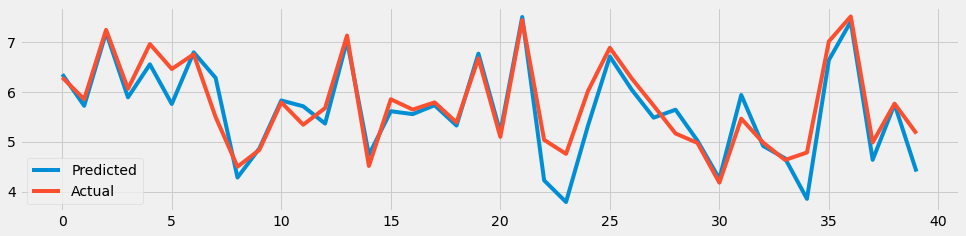

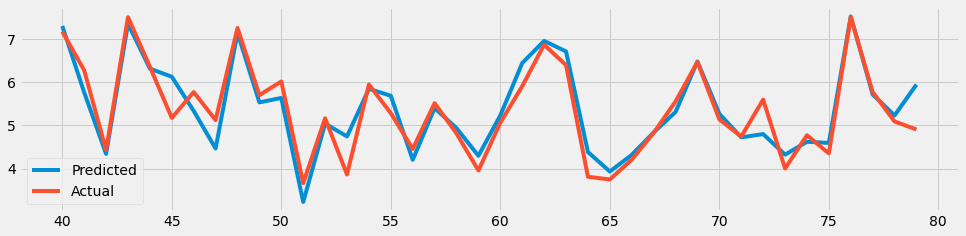

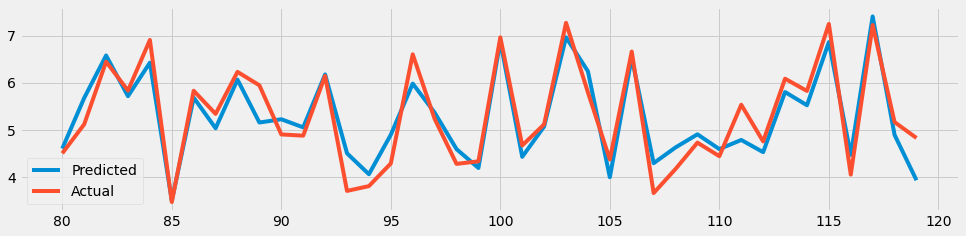

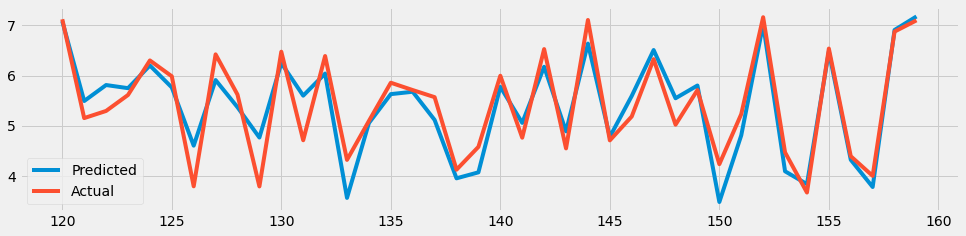

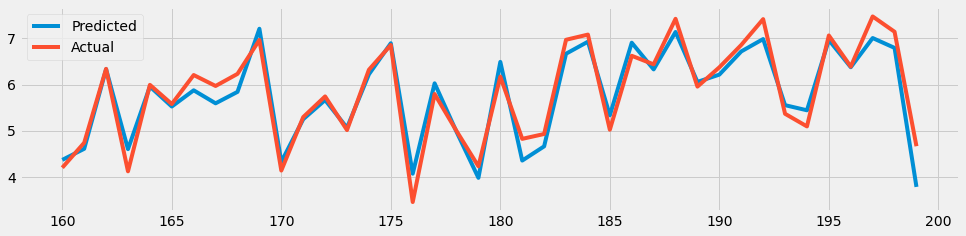

In [14]:
# Try and plot the differences.
bins = [0, 40, 80, 120, 160]
for i in bins:
    results.iloc[i:i+40].plot(y=['Predicted', 'Actual'], figsize=(15,3.5))

In [17]:
# DataFrame of predictions.
results_train = pd.DataFrame(zip(train_vals, y_train), columns=['Predicted', 'Actual'])
results_train['Difference'] = abs(results_train['Predicted'] - results_train['Actual'])
results_train

,Predicted,Actual,Difference
0,3.771989,3.832,0.060011
1,6.564873,6.533,0.031873
2,6.320886,6.441,0.120114
3,5.611539,5.866,0.254461
4,7.133779,7.280,0.146221
...,...,...,...
656,4.704917,4.656,0.048917
657,7.297327,7.594,0.296673
658,2.678316,2.662,0.016316
659,5.743031,5.885,0.141969


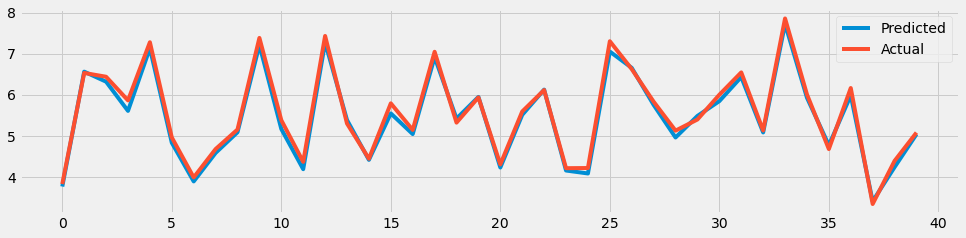

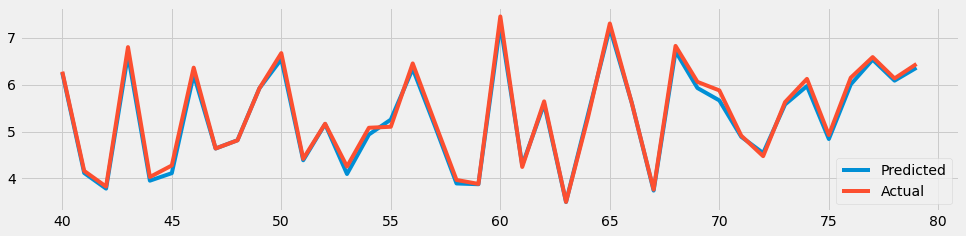

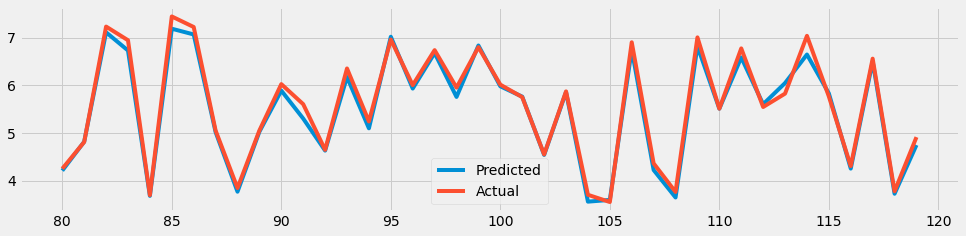

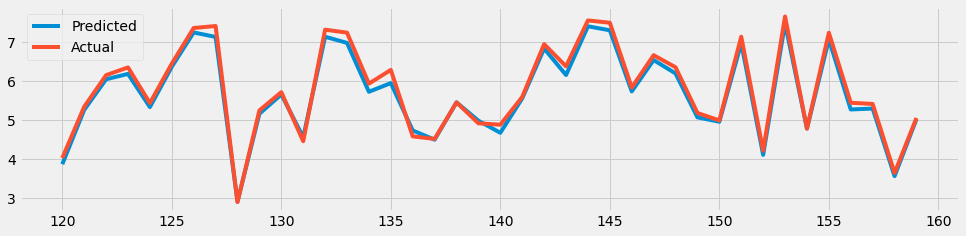

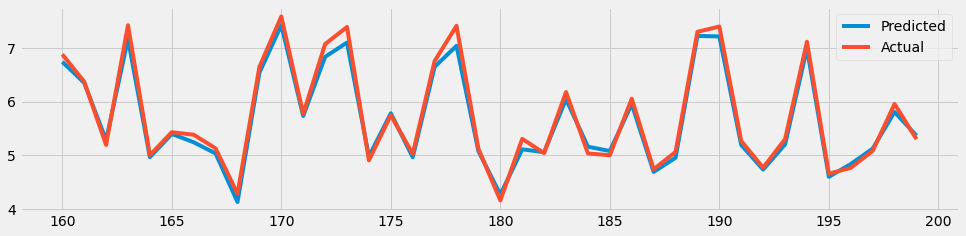

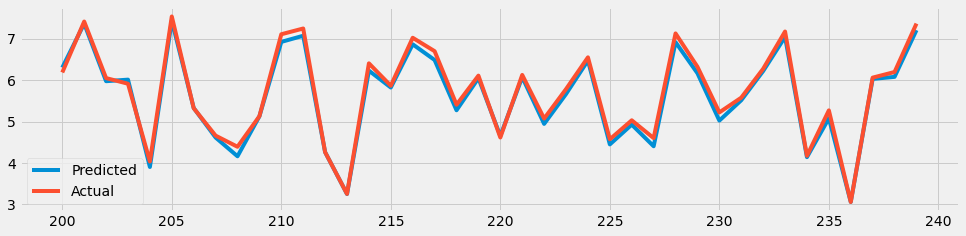

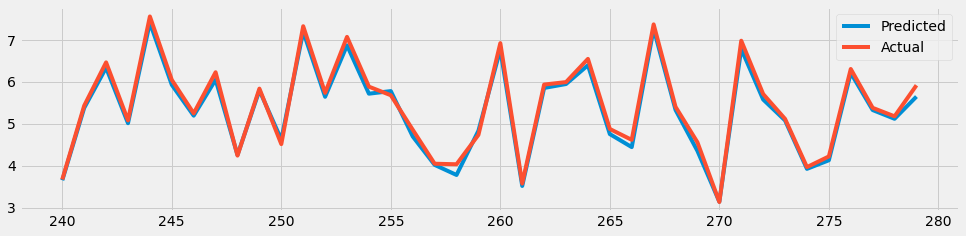

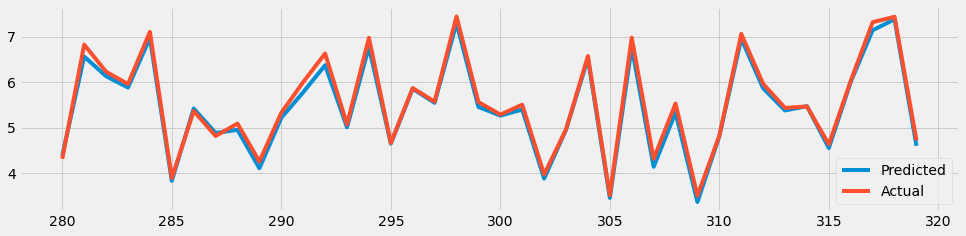

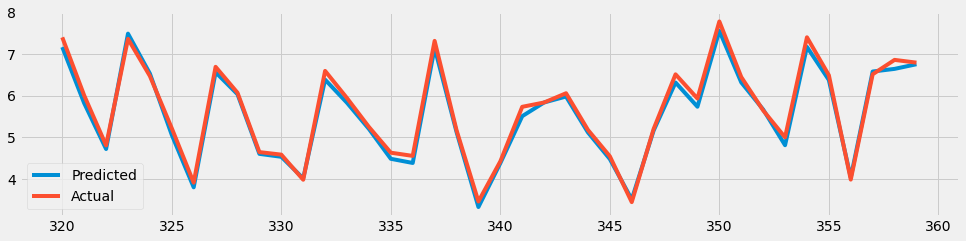

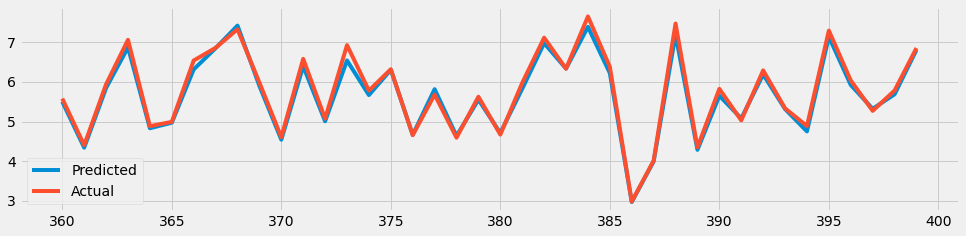

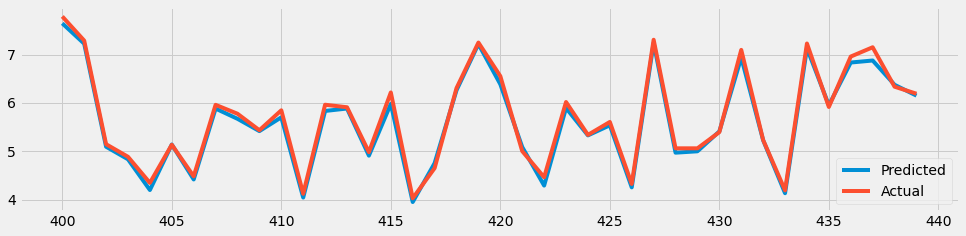

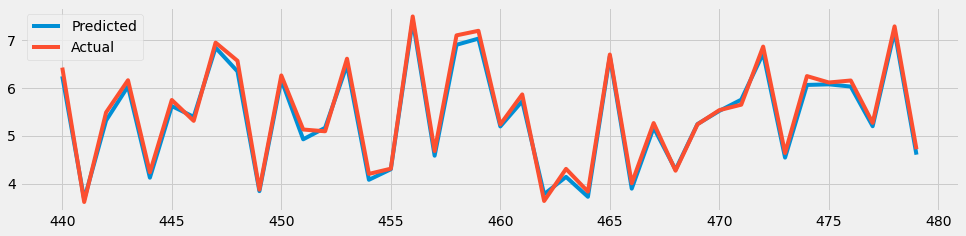

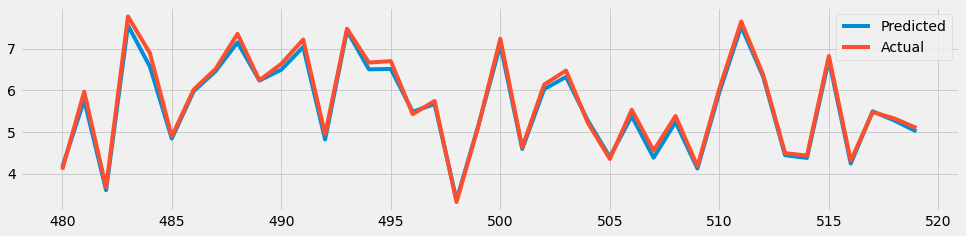

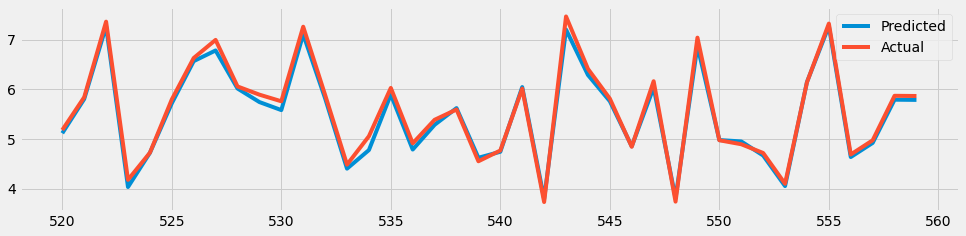

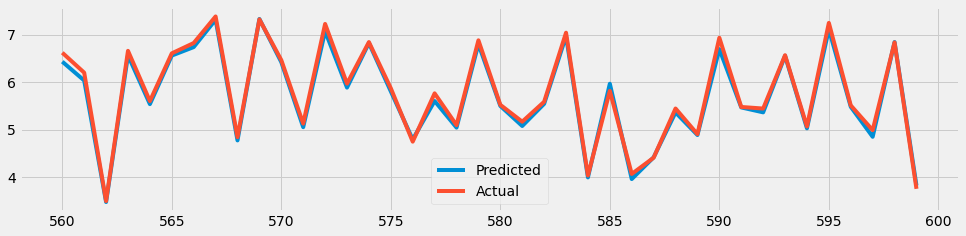

In [18]:
# Try and plot the differences.
bins = [0, 40, 80, 120, 160]
for i in range(0, 600, 40):
    results_train.iloc[i:i+40].plot(y=['Predicted', 'Actual'], figsize=(15,3.5))